# Lab 5 - Classification :  k-NN and Naive Bayes (using sklearn libraries)

## k-NN

Use **"Pima Indians Diabetes Dataset from UCI Machine Learning Repository"** for this question.It is a binary class dataset. Split the dataset into train(80%), validation(10%) and test sets(10%).

Run k-Nearest neighbours for different k values. Choose your own subset of k (atleast 10) and choose the best value of k from this subset. In solving real-world problems, the values of k are chosen based on experience and hence it is a tunable hyperparameter. Select the k, using validation set, which returns the best accuracy score. Report accuracy score by performing k-NN on the test dataset using the chosen k value. 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [9]:
dataset = pd.read_csv("datasets_228_482_diabetes.csv")
y = dataset["Outcome"]
del dataset["Outcome"]
X = dataset.copy()

In [10]:
np.random.seed(41)
X_train_and_val,X_test,y_train_and_val, y_test = train_test_split(X,y,test_size =0.1,shuffle = True)
X_train,X_val,y_train, y_val = train_test_split(X_train_and_val,y_train_and_val,test_size = 1/9, shuffle = True)

[0.6753246753246753, 0.7792207792207793, 0.7402597402597403, 0.7792207792207793, 0.7922077922077922, 0.7532467532467533, 0.7662337662337663, 0.8181818181818182, 0.7922077922077922, 0.7922077922077922, 0.7792207792207793]


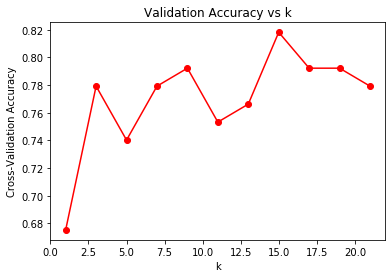

In [11]:
## Training multiple kNN models

#k-value search space
k_values = [1,3,5,7,9,11,13,15,17,19,21]
cv_scores = []
y_val = np.array(y_val).reshape(-1,1)
models = []

#Mean-Scale Normalisation of data
m,s = np.mean(X_train),np.std(X_train)
X_train = (X_train-m)/s
X_val = (X_val-m)/s
X_test = (X_test-m)/s

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)
    models.append(knn_model)
    y_val_pred = knn_model.predict(X_val).reshape(-1,1)
    cv_acc = np.sum(y_val==y_val_pred)/len(y_val)
    cv_scores.append(cv_acc)
    
k_best = k_values[cv_scores.index(max(cv_scores))]
best_model = models[k_values.index(k_best)]

plt.plot(k_values,cv_scores,"-or")
plt.xlabel("k")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Validation Accuracy vs k")
print(cv_scores)

In [12]:
print(k_best)

15


It can be noticed that $k=15$ gave rise to the best model with the highest validation accuracy of $0.81818$. This this model can be used for downstream analysis on test data. It can be observed that the plot does not follow a very smooth curve.

In [13]:
#Predicting test data
y_test_pred = best_model.predict(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
test_acc = np.sum(y_test_pred==y_test)/len(y_test)
print("Test Accuracy: %f"%test_acc)

Test Accuracy: 0.792208


Choosing the ideal value of the hyperparameter $k$ (number of nearest neighbours) while training the k-Nearest Neighbor algorithm is one of the most important steps. In order to do systematic search for the optimum value of $k$, we can train the algorithm using different values (preferably odd values in the case of binary classification) and determine the cross-validation accuracies of all of them. The ideal value of $k$ will be the one which has the highest cross-validation accuracy, and the same model can be evaluated on the test set. 

By doing so on the Pima Indians Diabetes Dataset, we obtain the ideal value of $k$ that has the best cross-validation accuracy ($81.82\%$) as $15$. Upon evaluating on the test set, we get an accuracy of $79.22\%$.

## Naive Bayes

Use **"Optical recognition of handwritten digits dataset"** for this question. ** Download dataset from sklearn**. The dataset has 10 classes and 64 attributes (8x8 images). Visualise images from the dataset. Perform a train test split in the ratio 4:1. 

Naive Bayes - perform multiclass classification to classify the dataset into one of the ten classes. Experiment with the priors (Gaussian and Bernoulli) and report the best prior. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too).



In [14]:
#importing useful functions
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix,f1_score

In [15]:
# Loading matrix
digits = load_digits()

In [16]:
X = digits.data
y = digits.target.reshape(-1,1)
np.random.seed(100)

#Train-test splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

Label: 9


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

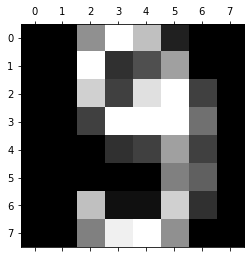

Label: 4


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

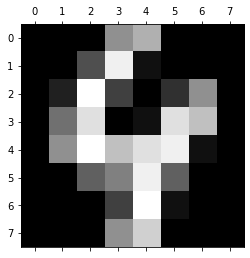

Label: 4


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

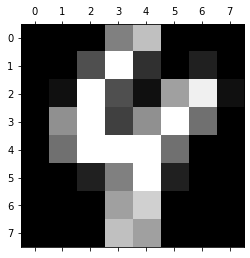

Label: 1


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

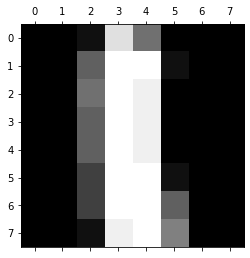

Label: 6


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

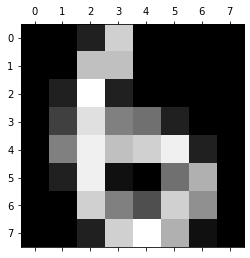

Label: 2


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

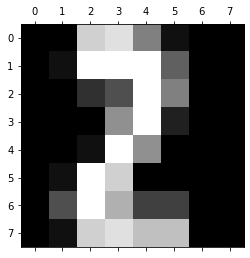

Label: 2


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

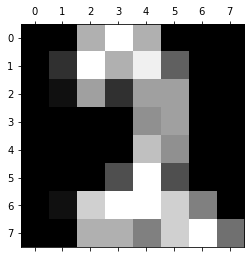

Label: 8


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

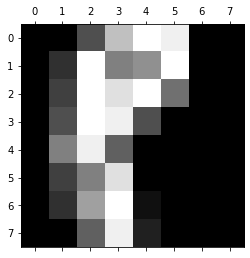

Label: 8


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

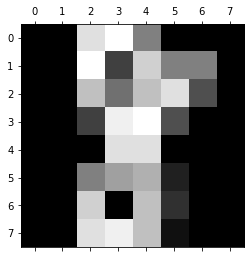

Label: 3


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

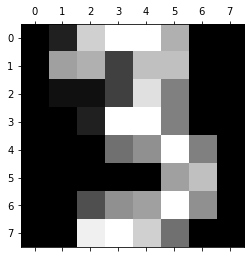

In [19]:
#Displaying Images
for i in range(10):
    print("Label: %d"%y_train[i])
    plt.gray()
    plt.figure(figsize=(10,10))
    plt.matshow(X_train[i,:].reshape(8,8)) 
    plt.show()

In [20]:
## Gaussian Naive Bayes
GaussNB = GaussianNB()

#Fitting training Data
GaussNB.fit(X_train,y_train.reshape(len(y_train),))

#Predicting training data labels
y_hat_train_g = GaussNB.predict(X_train).reshape(-1,1)

#Calculating Training Accuracy
train_acc_g = np.sum(y_hat_train_g==y_train)/len(y_train)
print("Training Accuracy (Gaussian Naive Bayes) = %f"%train_acc_g)

#Predicting test data labels
y_hat_test_g = GaussNB.predict(X_test).reshape(-1,1)

#Calculating Test Accuracy
test_acc_g = np.sum(y_hat_test_g==y_test)/len(y_test)
print("Test Accuracy (Gaussian Naive Bayes) = %f"%test_acc_g)

Training Accuracy (Gaussian Naive Bayes) = 0.848295
Test Accuracy (Gaussian Naive Bayes) = 0.838889


In [21]:
print("Confusion Matrix of Test predictions - Gaussian Naive Bayes:")
pd.DataFrame(confusion_matrix(y_test,y_hat_test_g))

Confusion Matrix of Test predictions - Gaussian Naive Bayes:


,0,1,2,3,4,5,6,7,8,9
0,41,0,0,0,0,0,0,0,0,1
1,0,30,0,0,0,0,0,0,2,0
2,0,8,24,0,0,0,0,0,9,0
3,0,0,0,27,0,1,0,2,1,1
4,0,1,0,0,26,1,1,5,2,0
5,0,1,0,1,0,32,0,1,0,0
6,0,2,0,0,0,1,37,0,0,0
7,0,0,0,0,1,0,0,38,0,0
8,0,5,0,0,0,1,0,1,20,0
9,0,1,1,3,1,1,0,2,0,27


**Where rows represent predicted class and columns represent actual (True) class.**

In [27]:
f1_gauss_class_wise = f1_score(y_test.reshape(len(y_test,)), y_hat_test_g.reshape(len(y_test,)), zero_division=1,labels=[i for i in range(10)],average=None)
for i in range(10):
    print("F1 Score of Class %d"%i+": %f"%f1_gauss_class_wise[i])

F1 Score of Class 0: 0.987952
F1 Score of Class 1: 0.750000
F1 Score of Class 2: 0.727273
F1 Score of Class 3: 0.857143
F1 Score of Class 4: 0.812500
F1 Score of Class 5: 0.888889
F1 Score of Class 6: 0.948718
F1 Score of Class 7: 0.863636
F1 Score of Class 8: 0.655738
F1 Score of Class 9: 0.830769


In [37]:
f1_score_gauss_avg = f1_score(y_test.reshape(len(y_test,)), y_hat_test_g.reshape(len(y_test,)), zero_division=1,labels=[i for i in range(10)],average="micro")
print("Micro-Averaged F1 score (Gaussian NB) = %f"%f1_score_gauss_avg)

Micro-Averaged F1 score (Gaussian NB) = 0.838889


In [23]:
## Bernouli Naive Bayes
BernNB = BernoulliNB()

#Fitting training Data
BernNB.fit(X_train,y_train.reshape(len(y_train),))

#Predicting training data labels
y_hat_train_b = BernNB.predict(X_train).reshape(-1,1)

#Calculating Training Accuracy
train_acc_b = np.sum(y_hat_train_b==y_train)/len(y_train)
print("Training Accuracy (Bernaoulli Naive Bayes) = %f"%train_acc_b)

#Predicting test data labels
y_hat_test_b = BernNB.predict(X_test).reshape(-1,1)

#Calculating Test Accuracy
test_acc_b = np.sum(y_hat_test_b==y_test)/len(y_test)
print("Test Accuracy (Bernaoulli Naive Bayes) = %f"%test_acc_b)

Training Accuracy (Bernaoulli Naive Bayes) = 0.854558
Test Accuracy (Bernaoulli Naive Bayes) = 0.877778


In [24]:
print("Confusion Matrix of Test predictions - Bernouli Naive Bayes:")
pd.DataFrame(confusion_matrix(y_test,y_hat_test_b))

Confusion Matrix of Test predictions - Bernouli Naive Bayes:


,0,1,2,3,4,5,6,7,8,9
0,39,0,0,0,3,0,0,0,0,0
1,0,24,1,0,0,0,0,1,5,1
2,0,2,33,3,0,0,0,1,2,0
3,0,0,1,28,0,1,0,1,1,0
4,0,0,0,0,34,0,0,2,0,0
5,1,1,0,1,0,29,0,0,0,3
6,0,0,0,0,0,0,38,0,2,0
7,0,0,0,0,1,0,0,38,0,0
8,0,2,0,2,0,0,1,0,21,1
9,0,0,0,2,0,0,0,2,0,32


**Where rows represent predicted class and columns represent actual (True) class.**

In [29]:
f1_bern_class_wise = f1_score(y_test.reshape(len(y_test,)), y_hat_test_b.reshape(len(y_test,)), zero_division=1,labels=[i for i in range(10)],average=None)
for i in range(10):
    print("F1 Score of Class %d"%i+": %f"%f1_bern_class_wise[i])

F1 Score of Class 0: 0.951220
F1 Score of Class 1: 0.786885
F1 Score of Class 2: 0.868421
F1 Score of Class 3: 0.823529
F1 Score of Class 4: 0.918919
F1 Score of Class 5: 0.892308
F1 Score of Class 6: 0.962025
F1 Score of Class 7: 0.904762
F1 Score of Class 8: 0.724138
F1 Score of Class 9: 0.876712


In [38]:
f1_score_bern_avg = f1_score(y_test.reshape(len(y_test,)), y_hat_test_b.reshape(len(y_test,)), zero_division=1,labels=[i for i in range(10)],average="micro")
print("Micro-Averaged F1 score (Bernoulli NB) = %f"%f1_score_bern_avg)

Micro-Averaged F1 score (Bernoulli NB) = 0.877778


One very important assumption of the Naive Bayes algorithm is that the features of the dataset are conditionally independent of the each other with respect to the labels. Apart from this, while implementing Naive Bayes classification algorithm on any dataset, it is also important to assume the distribution of the likelihood term $P(X|y)$ appropriately. Since most of the times we are not aware of the underlying distribution of the likelihood, it is better to try out different distributions and evaluate their performances. This would help in choosing the best distribution. Some of the common distibutions that are used for assumption are Gaussian, Bernoulli, Binomial, Multinomial and so on.

In this assignment, Naive Bayes classifier with both Gaussian and Bernoulli distributions and their evaluations on the test data and the F1 scores (nearly equal to test accuracy) were compared. 

It was noted that F1 score was higher in the case of Bernoulli NB ($0.87778$), when compared to that of Gaussian NB ($0.8389$). This result is not very surprising. Each feature of the image takes integer values and lies between 0 (min) and 16 (max), making it discrete as opposed to contintuous. Therefore, the feature vector of any sample can be thought of being derived from a dictionary of 64 words, and the value of the feature representing the number of occurrences of a word.

For such features taking discrete values, discrete distributions such as Bernoulli or Multinomial would be more suitable than Gaussian. In the case of Bernoulli, the features are binarized as per requirement. Gaussian distribution is suitable for modelling continuous feature variables that rely more on the mean and variance.